In [32]:
import numpy as np
import pandas as pd
import os, sys
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [262]:
# drive_path = r'/Volumes/External Data'
# from allensdk.core.brain_observatory_cache import BrainObservatoryCache
# boc = BrainObservatoryCache(manifest_file=os.path.join(drive_path,'BrainObservatory/manifest.json'))

In [2]:
sys.path.append(r'/Users/saskiad/visual_coding_2p_analysis/visual_coding_2p_analysis')
import core

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_file = core.get_manifest_path()
print(manifest_file)
boc = BrainObservatoryCache(manifest_file=manifest_file)

/Volumes/programs/braintv/workgroups/cortexmodels/michaelbu/ObservatoryPlatformPaperAnalysis/platform_boc_2018_09_25/manifest.json


In [4]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings
from allensdk.brain_observatory.static_gratings import StaticGratings
from allensdk.brain_observatory.natural_scenes import NaturalScenes

In [5]:
from allensdk.brain_observatory.natural_movie import NaturalMovie

In [6]:
import patched_circle_plots as pcp

In [264]:
# new_event_path = r'/Volumes/aibs/mat/gkocker/l0events_threshold2'

In [8]:
analysis_path = core.get_save_path()

In [9]:
def save_figure(fig, fname, formats=['.png','.pdf'], transparent=False, dpi=300, facecolor=None, **kwargs):
    import matplotlib as mpl
    mpl.rcParams['pdf.fonttype'] = 42

    if 'size' in kwargs.keys():
        fig.set_size_inches(kwargs['size'])

    elif 'figsize' in kwargs.keys():
        fig.set_size_inches(kwargs['figsize'])
    else:
        fig.set_size_inches(fig.get_figwidth(), fig.get_figheight())
        # fig.set_size_inches(11, 8.5)
    for f in formats:
        fig.savefig(
            fname + f,
            transparent=transparent,
            orientation='landscape',
            dpi=dpi
        )

In [10]:
dg_path = os.path.join(analysis_path, 'DriftingGratings')
sg_path = os.path.join(analysis_path, 'StaticGratings')
ns_path = os.path.join(analysis_path, 'NaturalScenes')
nm_path = os.path.join(analysis_path, 'NaturalMoviesA')

In [11]:
tfvals = [1,2,4,8,15]
sfvals = [0.02, 0.04, 0.08, 0.16, 0.32]

In [33]:
cell_id = 517515819

In [34]:
session_A =  boc.get_ophys_experiments(cell_specimen_ids=[cell_id], stimuli=['drifting_gratings'])[0]['id']
dataset = boc.get_ophys_experiment_data(session_A)

id_A = dataset.get_cell_specimen_indices(cell_specimen_ids=[cell_id])[0]

dg_file = os.path.join(dg_path, str(session_A)+'_dg_events_analysis.h5')

f = h5py.File(dg_file)
response_dg = f['response_events'].value
f.close()

response_A = response_dg[:,:,id_A,:]
peak = np.where(response_A[:,:,0]==np.nanmax(response_A[:,:,0]))

ori_dg = peak[0][0]
tf = peak[1][0]

In [35]:
print session_A

502608215


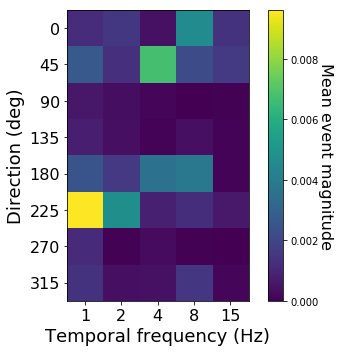

In [36]:
fig = plt.figure(figsize=(6,5))
plt.imshow(response_A[:,1:,0], cmap='viridis', interpolation='none')
plt.xticks(range(5), tfvals)
plt.yticks(range(8), range(0,360,45))
plt.xlabel("Temporal frequency (Hz)", fontsize=18)
plt.ylabel("Direction (deg)", fontsize=18)
plt.tick_params(labelsize=16)
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad=15
cbar.set_label("Mean event magnitude", fontsize=16, rotation=270)
plt.tight_layout()
# figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_dg_oritf'
# save_figure(fig, figname)

In [17]:
sweep_events = pd.read_hdf(dg_file, 'sweep_events')

In [37]:
mean_sweep_events = pd.read_hdf(dg_file, 'mean_sweep_events')

stim_table = dataset.get_stimulus_table('drifting_gratings')

In [19]:
import allensdk.brain_observatory.circle_plots as cp

In [20]:
hex_pos = cp.hex_pack(0.3, 15)

In [21]:
mean_sweep_events[str(id_A)].mean()

0.0021020110277387384

In [23]:
fp = cp.FanPlotter.for_drifting_gratings()

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


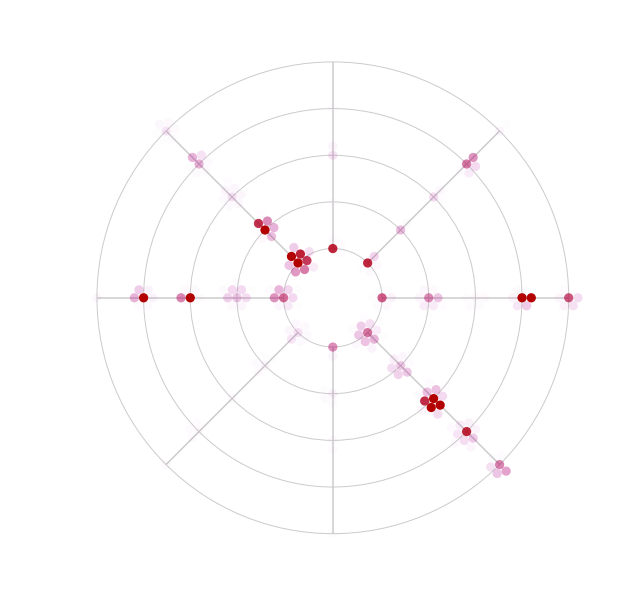

In [38]:
cmin = response_A[0,0,0]
cmax = mean_sweep_events[str(id_A)].mean() + (mean_sweep_events[str(id_A)].std()*3)

fig = plt.figure(figsize=(8,8))
mask = stim_table.dropna(subset=['orientation']).index
fp.plot(r_data=stim_table.temporal_frequency.ix[mask].values, 
                   angle_data=stim_table.orientation.ix[mask].values,
                  data = mean_sweep_events[str(id_A)].ix[mask].values, clim=[cmin,cmax])
fp.show_axes(closed=True)
plt.axis('off')
figname = r'/Users/saskiad/Documents/Data/CAM/Direction tuning TF/517515819_star_plot'
save_figure(fig, figname)

In [1136]:
print cmin, cmax

0.000217038999006 0.026023803776


In [1101]:
from matplotlib.colors import LinearSegmentedColormap

In [1102]:
dcm = LinearSegmentedColormap.from_list('default', [[.7,0,.7,0.0],[.7,0,0,1]])

In [1104]:
dcm(0.5)

(0.69999999999999996, 0.0, 0.34862745098039216, 0.50196078431372548)

In [1109]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [ ]:
circles = [ mpatches.Circle( (0,0), radii[0] ) ]

In [1249]:
patches = []
circle = mpatches.Circle( (0,0), 1) 
patches.append(circle)

In [1250]:
p = PatchCollection(patches, cmap=dcm)
p.set_clim([0.,1.])
p.set_array(np.array(dcm(0.25)))

In [1251]:
dcm(0.0002)

(0.69999999999999996, 0.0, 0.69999999999999996, 0.0)

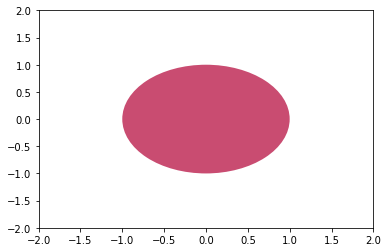

In [1252]:
fig,ax = plt.subplots()
ax.set_xlim(-2,2,)
ax.set_ylim(-2,2)
ax.add_collection(p)

In [1622]:
values = mean_sweep_events[(stim_table.orientation==270)&(stim_table.temporal_frequency==4)][str(id_A)].values

In [1623]:
values

array([ 0.0074011 ,  0.00640996,  0.06592284,  0.0297303 ,  0.07096573,
        0.07341822,  0.01805729,  0.02099856,  0.01396661,  0.02165787,
        0.02389176,  0.00441448,  0.01935592,  0.00635024,  0.01412319])

In [1277]:
patches=[]
color=[]
for i in range(15):
    circle = mpatches.Circle( (0,(i+0.5)), 0.3) 
    patches.append(circle)
#     color.append(dcm(values[i]))
    color.append(values[i])
p = PatchCollection(patches, cmap=dcm)
p.set_array(np.array(color))
p.set_clim([dcm(cmin),dcm(cmax)])

(-1.3999999999999999, 1.3999999999999999, -1.0, 16.0)

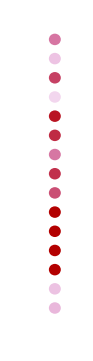

In [1278]:
fig = plt.figure(figsize=(1,6))
ax = fig.add_subplot(111)
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1,16)
ax.add_collection(p)
p.set_clim([cmin,cmax])
plt.axis('off')

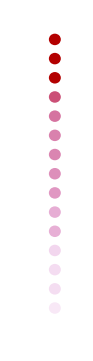

In [1626]:
patches=[]
color=[]
values_sort = np.sort(values)
for i in range(len(values)):
    circle = mpatches.Circle( (0,(i+0.5)), 0.3) 
    patches.append(circle)
#     color.append(dcm(values[i]))
    color.append(values_sort[i])
p = PatchCollection(patches, cmap=dcm)
p.set_array(np.array(color))
p.set_clim([dcm(cmin),dcm(cmax)])

fig = plt.figure(figsize=(1,6))
ax = fig.add_subplot(111)
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1,16)
ax.add_collection(p)
p.set_clim([cmin,cmax])
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_dg_sorted'
save_figure(fig, figname)

In [1326]:
values_sort = np.sort(values)[::-1]
print values
print values_sort

[ 0.0074011   0.00640996  0.06592284  0.0297303   0.07096573  0.07341822
  0.01805729  0.02099856  0.01396661  0.02165787  0.02389176  0.00441448
  0.01935592  0.00635024  0.01412319]
[ 0.07341822  0.07096573  0.06592284  0.0297303   0.02389176  0.02165787
  0.02099856  0.01935592  0.01805729  0.01412319  0.01396661  0.0074011
  0.00640996  0.00635024  0.00441448]


(-2.0, 2.0, -2.0, 2.0)

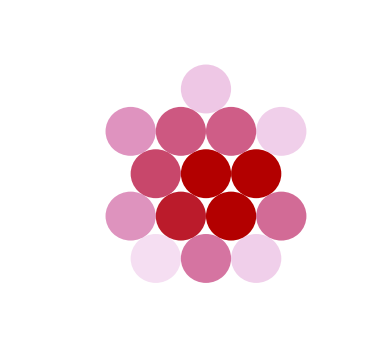

In [1331]:
patches=[]
color=[]
for i in range(15):
    circle = mpatches.Circle( hex_pos[i], 0.3) 
    patches.append(circle)
#     color.append(dcm(values[i]))
    color.append(values_sort[i])
p = PatchCollection(patches, cmap=dcm)
p.set_array(np.array(color))
p.set_clim([dcm(cmin),dcm(cmax)])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_xlim(-2, 2)
ax.set_ylim(-2,2)
ax.add_collection(p)
p.set_clim([cmin,cmax])
plt.axis('off')

In [1274]:
17/6.

2.8333333333333335

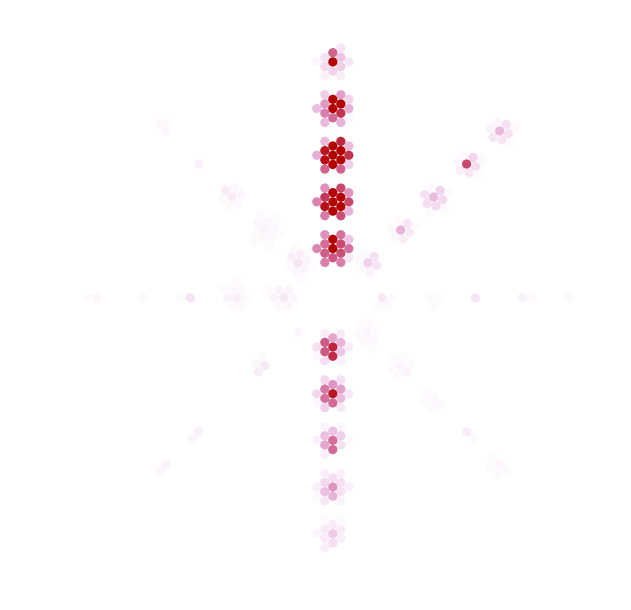

In [511]:
fig = plt.figure(figsize=(8,8))
mask = stim_table.dropna(subset=['orientation']).index
fp.plot(r_data=stim_table.temporal_frequency.ix[mask].values, 
                   angle_data=stim_table.orientation.ix[mask].values,
                  data = mean_sweep_events[str(id_A)].ix[mask].values, clim=[cmin,cmax])
# fp.show_axes(closed=True)
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_dg_star'
# save_figure(fig, figname)

In [259]:
stim_table.head()

,temporal_frequency,orientation,blank_sweep,start,end
0,8.0,90.0,0.0,736,796
1,8.0,0.0,0.0,827,887
2,1.0,270.0,0.0,917,977
3,8.0,135.0,0.0,1008,1068
4,2.0,135.0,0.0,1098,1158


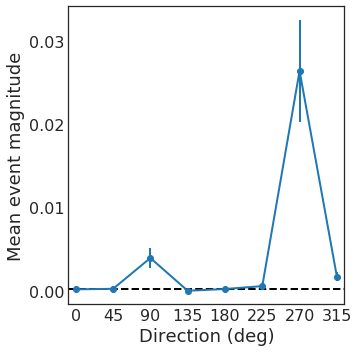

In [495]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(5,5))
    plt.errorbar(range(8), response_A[:,tf,0], yerr=response_A[:,tf,1], fmt='o-', lw=2)
    plt.xlim(-0.2,7.2)
    plt.xticks(range(8), range(0,360,45), fontsize=16)
    plt.xlabel("Direction (deg)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_A[0,0,0], ls='--', color='k', lw=2)
#     plt.ylim(-0.001, 0.033)
    plt.yticks([0,0.01, 0.02, 0.03])
    plt.ylabel("Mean event magnitude", fontsize=18)
    plt.tight_layout()
    figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_dg_ori'
    save_figure(fig, figname)

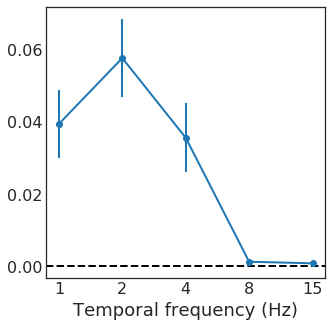

In [176]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(5,5))
    plt.errorbar(range(5), response_A[ori_dg,1:,0], yerr=response_A[ori_dg,1:,1], fmt='o-', lw=2)
    plt.xlim(-0.2, 4.2)
    plt.xticks(range(5), tfvals, fontsize=16)
    plt.xlabel("Temporal frequency (Hz)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_A[0,0,0], ls='--', color='k', lw=2)
#     plt.ylim(-0.001, 0.033)
    plt.yticks([0,0.02, 0.04, 0.06])
    figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_3_dg_tf'
    save_figure(fig, figname)

In [1412]:
cell_list

[576381664, 576370769, 517475944, 576382869]

In [1642]:
session_B =  boc.get_ophys_experiments(cell_specimen_ids=[cell_list[2]], stimuli=['static_gratings'])[0]['id']
dataset = boc.get_ophys_experiment_data(session_B)

id_B = dataset.get_cell_specimen_indices(cell_specimen_ids=[cell_list[2]])[0]

sg_file = os.path.join(sg_path, str(session_B)+'_sg_events_analysis.h5')

f = h5py.File(sg_file)
response_sg = f['response_events'].value
f.close()

response_B = response_sg[:,:,:,id_B,:]

peak = np.where(response_B[:,1:,:,0]==np.nanmax(response_B[:,1:,:,0]))

ori = peak[0][0]
sf = peak[1][0]
phase = peak[2][0]

In [1596]:
print ori, sf, phase

3 1 3


In [1611]:
mean_sweep_events = pd.read_hdf(sg_file, 'mean_sweep_events')

stim_table_sg = dataset.get_stimulus_table('static_gratings')

In [1598]:
sweep_events = pd.read_hdf(sg_file, 'sweep_events')

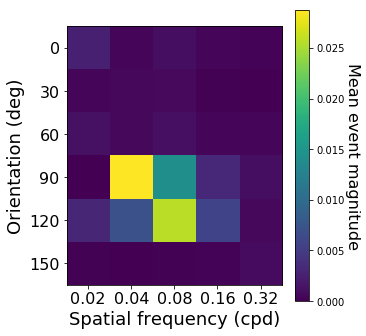

In [1283]:
fig = plt.figure(figsize=(5,5))
im = plt.imshow(response_B[:,1:,phase,0], cmap='viridis', interpolation='none')
plt.xticks(range(5), sfvals)
plt.yticks(range(6), range(0,180,30))
plt.xlabel("Spatial frequency (cpd)", fontsize=18)
plt.ylabel("Orientation (deg)", fontsize=18)
plt.tick_params(labelsize=16)
cbar = plt.colorbar(im, fraction=0.1, pad=0.05)
cbar.ax.get_yaxis().labelpad=15
cbar.set_label("Mean event magnitude", fontsize=16, rotation=270)
plt.tight_layout()
# figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_sg_orisf'
# save_figure(fig, figname)

In [1612]:
subset = sweep_events[(stim_table_sg.orientation==90)&(stim_table_sg.spatial_frequency==0.04)&(stim_table_sg.phase==0.75)][str(id_B)]

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [1594]:
subset.iloc[9]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

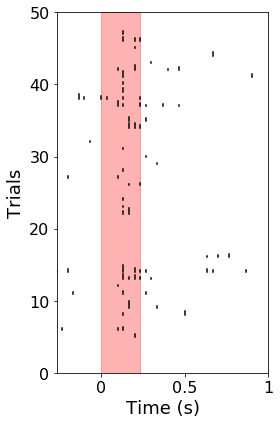

In [1602]:
fig = plt.figure(figsize=(4,6))
for i in range(len(subset)):
    test = subset.iloc[i]
    for a in np.where(test>0)[0]:
        plt.plot([a,a],[(i*1),(i*1)+1.5*test[a]], 'k')
plt.xlim(20,50)
plt.ylim(0,50)
plt.axvspan(28,35, color='r', alpha=0.3)
plt.xticks([28,43,58],[0,0.5,1])
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Trials", fontsize=18)
plt.tick_params(labelsize=16)
plt.tight_layout()
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_sg_peak'
save_figure(fig, figname)

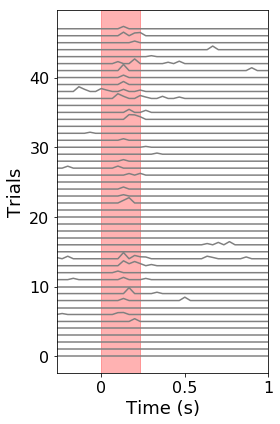

In [1285]:
fig = plt.figure(figsize=(4,6))
for i in range(len(subset)):
    plt.plot(subset.iloc[i]+(i*0.7), color='gray')
plt.xlim(20,50)
plt.axvspan(28,35, color='r', alpha=0.3)
plt.xticks([28,43,58],[0,0.5,1])
plt.yticks([0,7,14,21,28],[0,10,20,30,40])
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Trials", fontsize=18)
plt.tick_params(labelsize=16)
plt.tight_layout()
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_sg_peak'
# save_figure(fig, figname)

In [1613]:
values = mean_sweep_events[(stim_table_sg.orientation==90)&(stim_table_sg.spatial_frequency==0.04)&
                          (stim_table_sg.phase==0.75)][str(id_B)].values

In [1614]:
values

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.02784037,  0.03848123,  0.        ,  0.02103394,  0.07311258,
        0.        ,  0.03524422,  0.01625458,  0.14445574,  0.13291856,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.08028329,  0.01318893,  0.02057751,
        0.        ,  0.03363612,  0.02076355,  0.01542228,  0.01149806,
        0.00828034,  0.01538619,  0.        ,  0.        ,  0.11871367,
        0.05176564,  0.        ,  0.13472079,  0.03593286,  0.03041032,
        0.02435646,  0.06150205,  0.0672788 ,  0.00948975,  0.        ,
        0.01657926,  0.09615044,  0.0237884 ])

(-4.2000000000000002, 4.2000000000000002, -1.0, 50.0)

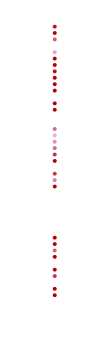

In [1297]:
patches=[]
color=[]
for i in range(len(values)):
    circle = mpatches.Circle( (0,(i+0.5)), 0.3) 
    patches.append(circle)
#     color.append(dcm(values[i]))
    color.append(values[i])
p = PatchCollection(patches, cmap=dcm)
p.set_array(np.array(color))
p.set_clim([dcm(cmin),dcm(cmax)])

fig = plt.figure(figsize=(1,6))
ax = fig.add_subplot(111)
ax.set_xlim(-4.2, 4.2)
ax.set_ylim(-1,50)
ax.add_collection(p)
p.set_clim([cmin,cmax])
plt.axis('off')

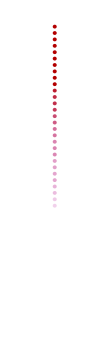

In [1616]:
patches=[]
color=[]
values_sort = np.sort(values)
for i in range(len(values)):
    circle = mpatches.Circle( (0,(i+0.5)), 0.3) 
    patches.append(circle)
#     color.append(dcm(values[i]))
    color.append(values_sort[i])
p = PatchCollection(patches, cmap=dcm)
p.set_array(np.array(color))
p.set_clim([dcm(cmin),dcm(cmax)])

fig = plt.figure(figsize=(1,6))
ax = fig.add_subplot(111)
ax.set_xlim(-4.2, 4.2)
ax.set_ylim(-1,50)
ax.add_collection(p)
p.set_clim([cmin,cmax])
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_sg_sorted'
save_figure(fig, figname)

(-2.0, 2.0, -2.0, 2.0)

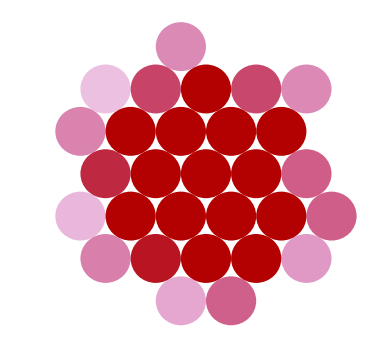

In [1338]:
values_sort = np.sort(values)[::-1]
hex_pos = cp.hex_pack(0.3, len(values))
patches=[]
color=[]
for i in range(len(values)):
    circle = mpatches.Circle( hex_pos[i], 0.3) 
    patches.append(circle)
#     color.append(dcm(values[i]))
    color.append(values_sort[i])
p = PatchCollection(patches, cmap=dcm)
p.set_array(np.array(color))
p.set_clim([dcm(cmin),dcm(cmax)])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_xlim(-2, 2)
ax.set_ylim(-2,2)
ax.add_collection(p)
p.set_clim([cmin,cmax])
plt.axis('off')

In [1296]:
51/6.

8.5

In [1290]:
len(values)

48

In [21]:
fpb = cp.FanPlotter.for_static_gratings()

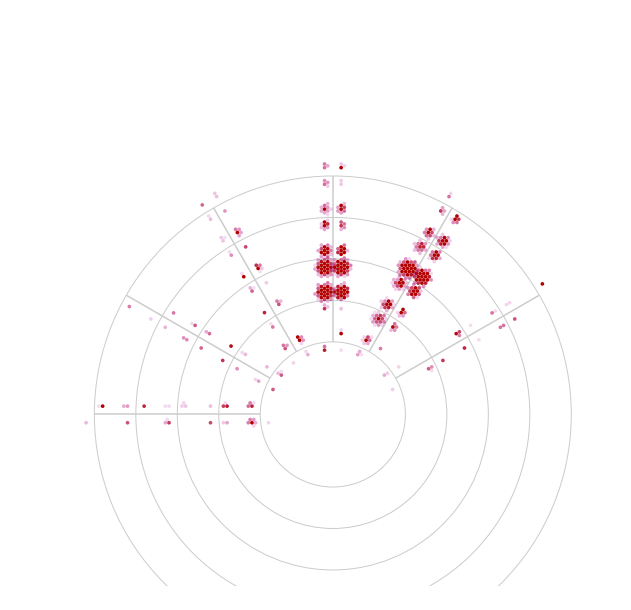

In [1408]:
cmin = response_B[0,0,0,0]
cmax = mean_sweep_events[str(id_B)].mean() + (mean_sweep_events[str(id_B)].std()*3)

fig = plt.figure(figsize=(8,8))
mask = stim_table_sg.dropna(subset=['orientation']).index
fpb.plot(r_data=stim_table_sg.spatial_frequency.ix[mask].values, 
                   angle_data=stim_table_sg.orientation.ix[mask].values,
        group_data=stim_table_sg.phase.ix[mask].values,
                  data = mean_sweep_events[str(id_B)].ix[mask].values, clim=[cmin,cmax])
fpb.show_axes(closed=False)
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_sg_fan'
# save_figure(fig, figname)

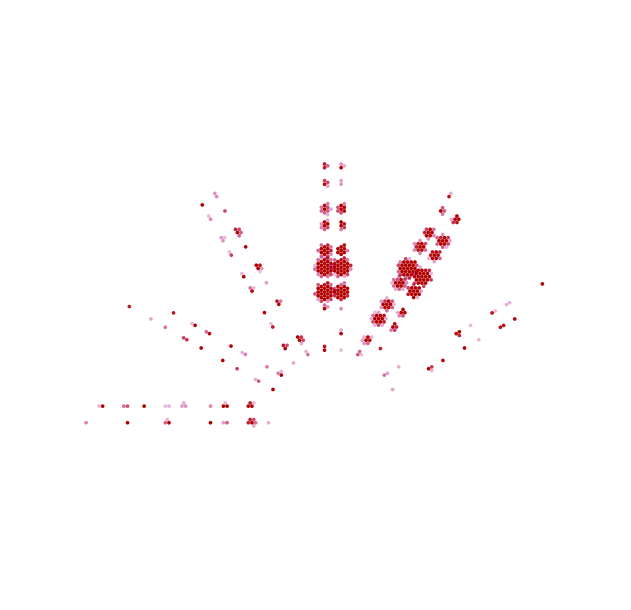

In [509]:
fig = plt.figure(figsize=(8,8))
mask = stim_table_sg.dropna(subset=['orientation']).index
fpb.plot(r_data=stim_table_sg.spatial_frequency.ix[mask].values, 
                   angle_data=stim_table_sg.orientation.ix[mask].values,
        group_data=stim_table_sg.phase.ix[mask].values,
                  data = mean_sweep_events[str(id_B)].ix[mask].values, clim=[cmin,cmax])
# fpb.show_axes(closed=False)
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_sg_fan'
# save_figure(fig, figname)

In [1409]:
fpb2 = pcp.FanPlotter.for_static_gratings()

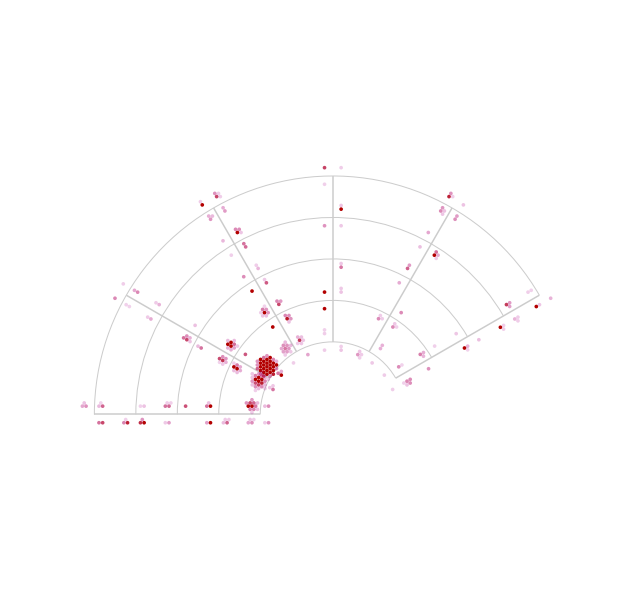

In [1417]:
##FIXED FAN PLOT 
    
cmin = response_B[0,0,0,0]
cmax = mean_sweep_events[str(id_B)].mean() + (mean_sweep_events[str(id_B)].std()*3)

fig = plt.figure(figsize=(8,8))
mask = stim_table_sg.dropna(subset=['orientation']).index
fpb2.plot(r_data=stim_table_sg.spatial_frequency.ix[mask].values, 
                   angle_data=stim_table_sg.orientation.ix[mask].values,
        group_data=stim_table_sg.phase.ix[mask].values,
                  data = mean_sweep_events[str(id_B)].ix[mask].values, clim=[cmin,cmax])
fpb2.show_axes(closed=False)
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_0_sg_fan'
# save_figure(fig, figname)

In [154]:
print ori, sf, phase

3 1 3


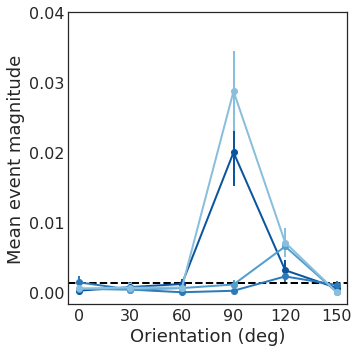

In [499]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(5,5))
    for i in range(4):
        plt.errorbar(range(6), response_B[:,sf+1,i,0], yerr=response_B[:,sf+1,i,1], fmt='o-', lw=2, color=sns.color_palette('Blues_r')[i])
    plt.xlim(-0.2,5.2)
    plt.xticks(range(6), range(0,180,30), fontsize=16)
    plt.xlabel("Orientation (deg)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_B[0,0,0,0], ls='--', color='k', lw=2)
#     plt.ylim(-0.001, 0.018)
    plt.yticks([0,0.01, 0.02, 0.03, 0.04])
    plt.ylabel("Mean event magnitude", fontsize=18)
    plt.tight_layout()
    figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_sg_ori'
    save_figure(fig, figname)

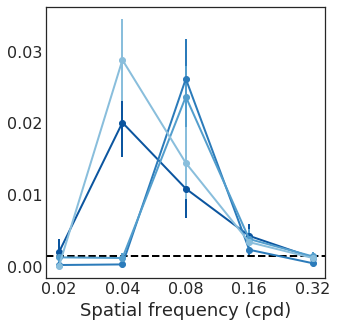

In [501]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(5,5))
    for i in range(4):
        plt.errorbar(range(5), response_B[ori,1:,i,0], yerr=response_B[ori,1:,i,1], fmt='o-', lw=2, color=sns.color_palette('Blues_r')[i])
    plt.xlim(-0.2, 4.2)
    plt.xticks(range(5), sfvals, fontsize=16)
    plt.xlabel("Spatial frequency (cpd)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_B[0,0,0,0], ls='--', color='k', lw=2)
#     plt.ylim(-0.001, 0.018)
    plt.yticks([0,0.01, 0.02, 0.03])
    figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_sg_sf'
    save_figure(fig, figname)

In [1643]:
ns_file = os.path.join(ns_path, str(session_B)+'_ns_events_analysis.h5')

f = h5py.File(ns_file)
response_ns = f['response_events'].value
f.close()

In [1644]:
peak = pd.read_hdf(ns_file, 'peak')

LIFETIME SPARSENESS EXAMPLE HERE

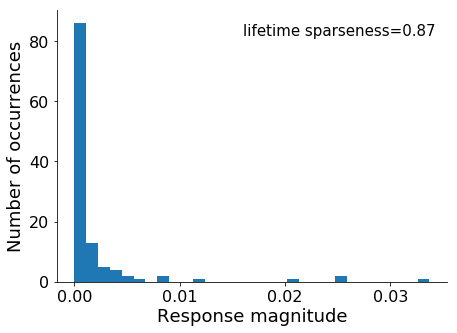

In [1648]:
nc=id_B
fig = plt.figure(figsize=(7,5))
plt.hist(response_ns[1:,nc,0], bins=30);
plt.xlabel("Response magnitude", fontsize=18)
plt.ylabel("Number of occurrences", fontsize=18)
plt.tick_params(labelsize=16)
ls = np.round(peak.lifetime_sparseness_ns[nc],2)
plt.text(s='lifetime sparseness='+str(ls), x=0.016, y=82, fontsize=15)
plt.xticks([0,0.01, 0.02, 0.03])
sns.despine(fig)
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_lifesparse'
save_figure(fig, figname)

In [1606]:
mean_sweep_events = pd.read_hdf(ns_file, 'mean_sweep_events')

stim_table_ns = dataset.get_stimulus_table('natural_scenes')

In [1607]:
sweep_events = pd.read_hdf(ns_file, 'sweep_events')

In [28]:
corp = cp.CoronaPlotter()

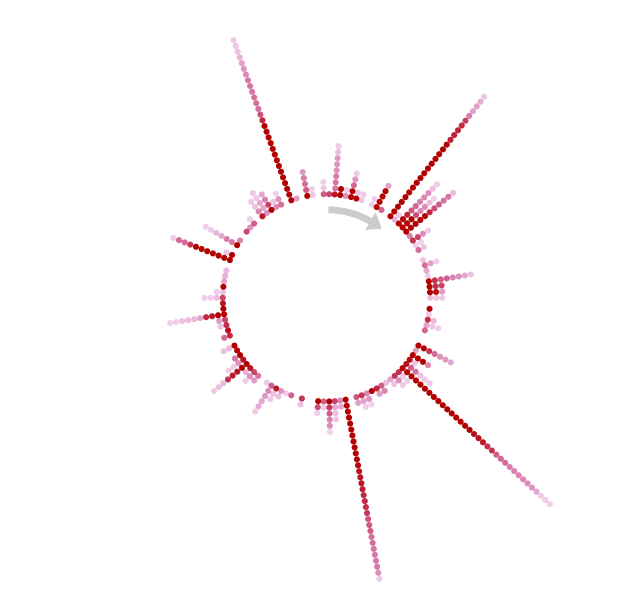

In [1301]:
cmin=response_ns[0,id_B,0]
cmax=mean_sweep_events[str(id_B)].mean()+mean_sweep_events[str(id_B)].std()*3

fig = plt.figure(figsize=(8,8))
mask = stim_table_ns[stim_table_ns.frame>=0].index
corp.plot(stim_table_ns.frame.ix[mask].values,
         data=mean_sweep_events[str(id_B)].ix[mask].values,
         clim=[cmin,cmax])
corp.show_arrow()
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_ns_corona'
# save_figure(fig, figname)

In [329]:
stim_table_ns.keys()

Index([u'orientation', u'spatial_frequency', u'phase', u'start', u'end'], dtype='object')

In [480]:
np.argmax(response_ns[1:,id_B,0])

43

In [162]:
response_ns.shape

(119, 76, 3)

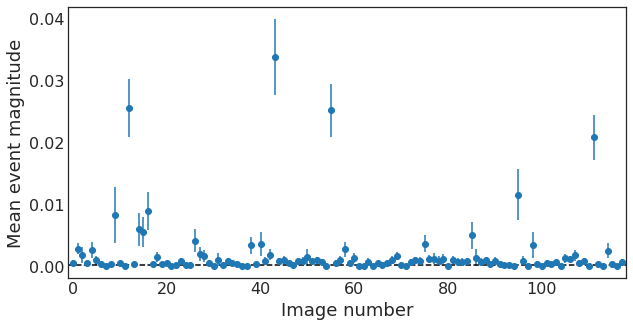

In [484]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(10,5))
    plt.errorbar(range(118), response_ns[1:,id_B,0], yerr=response_ns[1:,id_B,1], fmt='o')
    plt.xlim(-1, 118)
    plt.xlabel("Image number", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_ns[0,id_B,0], ls='--', color='k')
    plt.ylabel("Mean event magnitude", fontsize=18)
#     plt.ylim(-0.005, 0.1)
#     plt.yticks([0,0.005, 0.01, 0.015])
    figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_ns'
    save_figure(fig, figname)

In [1608]:
subset = sweep_events[stim_table_ns.frame==43][str(id_B)]

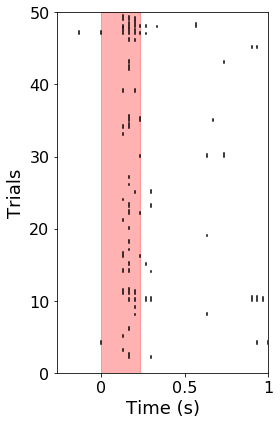

In [1610]:
fig = plt.figure(figsize=(4,6))
for i in range(len(subset)):
    test = subset.iloc[i]
    for a in np.where(test>0)[0]:
        plt.plot([a,a],[(i*1),(i*1)+1.5*test[a]], 'k')
plt.xlim(20,50)
plt.ylim(0,50)
plt.axvspan(28,35, color='r', alpha=0.3)
plt.xticks([28,43,58],[0,0.5,1])
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Trials", fontsize=18)
plt.tick_params(labelsize=16)
plt.tight_layout()
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_ns_peak'
save_figure(fig, figname)

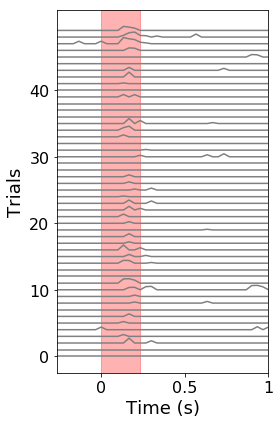

In [1303]:
fig = plt.figure(figsize=(4,6))
for i in range(len(subset)):
    plt.plot(subset.iloc[i]+(i*0.7), color='gray')
plt.xlim(20,50)
plt.axvspan(28,35, color='r', alpha=0.3)
plt.xticks([28,43,58],[0,0.5,1])
plt.yticks([0,7,14,21,28],[0,10,20,30,40])
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Trials", fontsize=18)
plt.tick_params(labelsize=16)
plt.tight_layout()
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_ns_peak'
# save_figure(fig, figname)

In [1343]:
values = mean_sweep_events[stim_table_ns.frame==43][str(id_B)].values

In [1344]:
values

array([ 0.        ,  0.        ,  0.07459578,  0.01906356,  0.        ,
        0.01582637,  0.02669022,  0.        ,  0.01167173,  0.01404539,
        0.12017002,  0.12307887,  0.        ,  0.        ,  0.06549454,
        0.03469278,  0.07511588,  0.01483383,  0.03028005,  0.        ,
        0.01632091,  0.02651516,  0.05581572,  0.05967152,  0.00695468,
        0.03126299,  0.01553727,  0.01979532,  0.        ,  0.        ,
        0.01621814,  0.00701444,  0.        ,  0.02112232,  0.06874091,
        0.08446843,  0.        ,  0.        ,  0.        ,  0.04912181,
        0.        ,  0.00671355,  0.05108523,  0.03076407,  0.        ,
        0.        ,  0.04897294,  0.18508912,  0.1584004 ,  0.10101011])

(-4.2000000000000002, 4.2000000000000002, -1.0, 50.0)

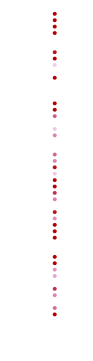

In [1308]:
patches=[]
color=[]
for i in range(len(values)):
    circle = mpatches.Circle( (0,(i+0.5)), 0.3) 
    patches.append(circle)
#     color.append(dcm(values[i]))
    color.append(values[i])
p = PatchCollection(patches, cmap=dcm)
p.set_array(np.array(color))
p.set_clim([dcm(cmin),dcm(cmax)])

fig = plt.figure(figsize=(1,6))
ax = fig.add_subplot(111)
ax.set_xlim(-4.2, 4.2)
ax.set_ylim(-1,50)
ax.add_collection(p)
p.set_clim([cmin,cmax])
plt.axis('off')

(-4.2000000000000002, 4.2000000000000002, -1.0, 50.0)

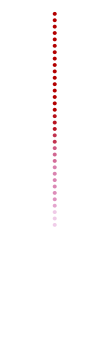

In [1346]:
patches=[]
color=[]
values_sort = np.sort(values)
for i in range(len(values)):
    circle = mpatches.Circle( (0,(i+0.5)), 0.3) 
    patches.append(circle)
#     color.append(dcm(values[i]))
    color.append(values_sort[i])
p = PatchCollection(patches, cmap=dcm)
p.set_array(np.array(color))
p.set_clim([dcm(cmin),dcm(cmax)])

fig = plt.figure(figsize=(1,6))
ax = fig.add_subplot(111)
ax.set_xlim(-4.2, 4.2)
ax.set_ylim(-1,50)
ax.add_collection(p)
p.set_clim([cmin,cmax])
plt.axis('off')

In [1634]:
session_A

502962794

In [1630]:
nm_file = os.path.join(nm_path, str(session_A)+'_nm_events_analysis.h5')

f = h5py.File(nm_file)
response_nm = f['response_events_1a'].value
response_trials_nm = f['response_trials_1a'].value
f.close()

In [1631]:
f = h5py.File(nm_file)
print f.keys()
f.close()

[u'peak', u'response_events_1a', u'response_events_3', u'response_trials_1a', u'response_trials_3']


In [289]:
response_trials_nm.shape

(3600, 89, 10)

In [33]:
tp = cp.TrackPlotter(ring_length=360)

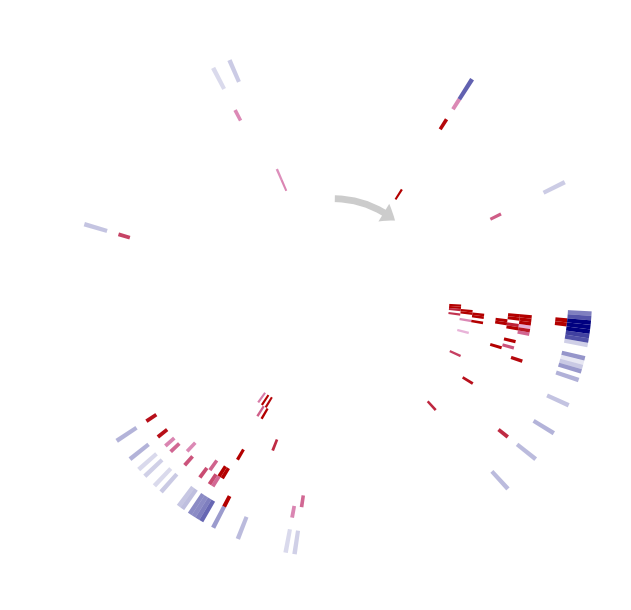

In [75]:
fig = plt.figure(figsize=(8,8))
data = response_trials_nm[:,id_A,:].T
tp.plot(data, clim=[0, data.mean()+data.std()*3])
tp.show_arrow()
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_3_nm_track'
save_figure(fig, figname)

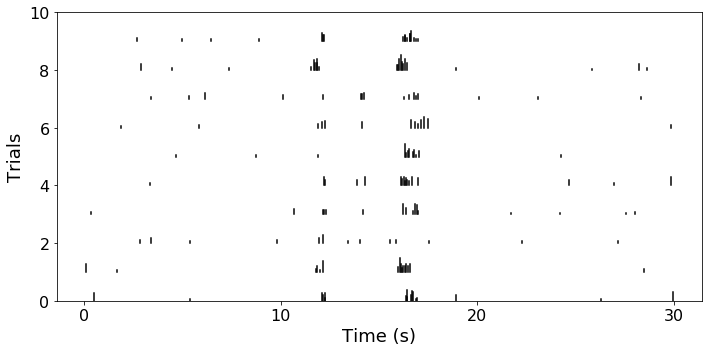

In [1639]:
# plt.plot(response_trials_nm[:,id_A,i]+(i*0.7), color='gray')

fig = plt.figure(figsize=(10,5))
for i in range(10):
    test = response_trials_nm[:,id_A,i]
    for a in np.where(test>0)[0]:
        plt.plot([a,a],[(i*1),(i*1)+1.5*test[a]], 'k')
# plt.xlim(20,50)
plt.ylim(0,10)
plt.xticks([0,300,600,900], [0,10,20,30])
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Trials", fontsize=18)
plt.tick_params(labelsize=16)
plt.tight_layout()
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_nm_trials'
save_figure(fig, figname)

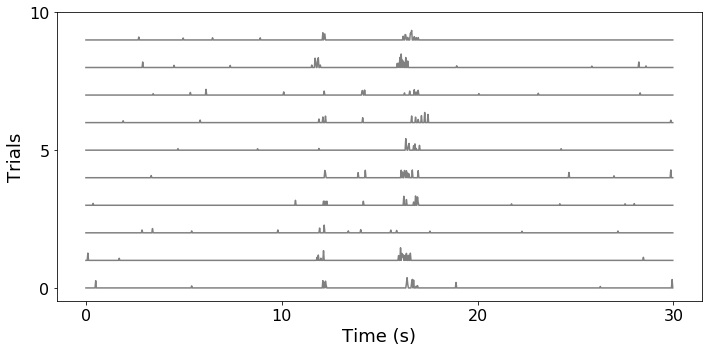

In [492]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(response_trials_nm[:,id_A,i]+(i*0.7), color='gray')
plt.yticks([0,3.5,7],[0,5,10])
plt.xticks([0,300,600,900], [0,10,20,30])
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Trials", fontsize=18)
plt.tick_params(labelsize=16)
plt.tight_layout()
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_2_nm_trials'
save_figure(fig, figname)

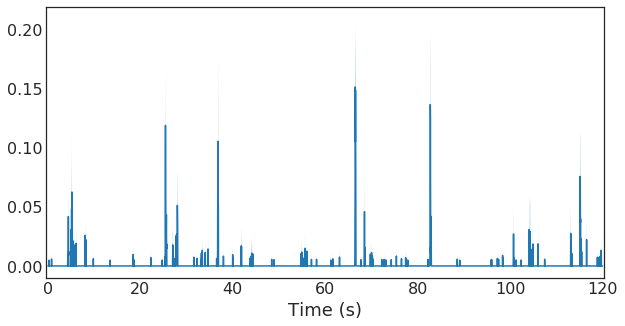

In [298]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(10,5))
    resp_p = response_nm[:,id_A,0]+response_nm[:,id_A,1]
    resp_n = response_nm[:,id_A,0]-response_nm[:,id_A,1]
    plt.fill_between(range(3600), resp_p, resp_n, alpha=0.5)
    plt.plot(response_nm[:,id_A,0])
    plt.tick_params(labelsize=16)
    plt.xticks(range(0,3601,600), range(0,121,20))
    plt.xlim(-10,3610)
    plt.xlabel("Time (s)", fontsize=18)
#     plt.ylim(-0.005, 0.1)
#     figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_3_nm3'
#     save_figure(fig, figname)

In [86]:
30*10

300

In [80]:
nc=1


In [186]:
session_A =  boc.get_ophys_experiments(cell_specimen_ids=[cell_list[nc]], stimuli=['drifting_gratings'])[0]['id']
dataset = boc.get_ophys_experiment_data(session_A)

id_A = dataset.get_cell_specimen_indices(cell_specimen_ids=[cell_list[nc]])[0]

dg_file = os.path.join(dg_path, str(session_A)+'_dg_events_analysis.h5')

f = h5py.File(dg_file)
response_dg = f['response_events'].value
f.close()

response_A = response_dg[:,:,id_A,:]

In [188]:
f = h5py.File(dg_file)
f.keys()

[u'mean_intersweep_events', u'mean_sweep_events', u'peak', u'response_events']

In [189]:
f.close()

In [82]:
peak = np.where(response_A[:,:,0]==np.nanmax(response_A[:,:,0]))

ori_dg = peak[0][0]
tf = peak[1][0]

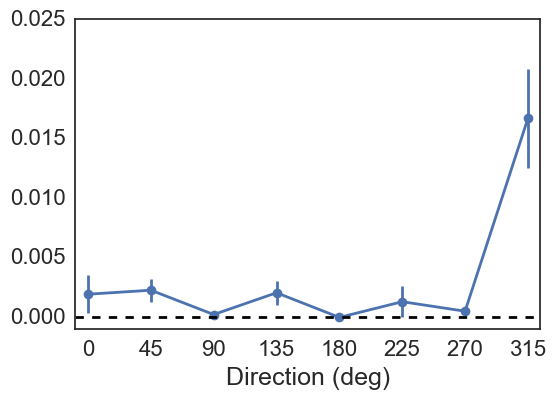

In [93]:
with sns.axes_style('white'):
    plt.figure(figsize=(6,4))
    plt.errorbar(range(8), response_A[:,tf,0], yerr=response_A[:,tf,1], fmt='o-', lw=2)
    plt.xlim(-0.2,7.2)
    plt.xticks(range(8), range(0,360,45), fontsize=16)
    plt.xlabel("Direction (deg)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_A[0,0,0], ls='--', color='k', lw=2)
    plt.ylim(-0.001, 0.025)

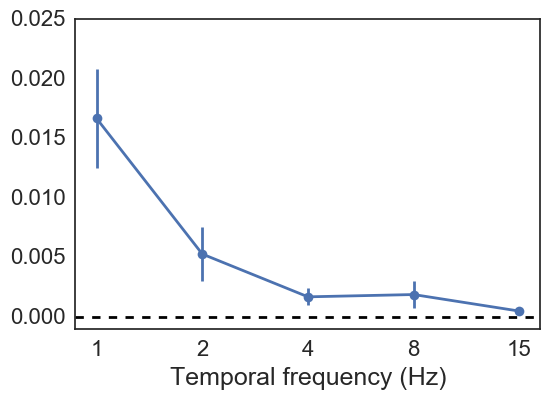

In [92]:
with sns.axes_style('white'):
    plt.figure(figsize=(6,4))
    plt.errorbar(range(5), response_A[ori_dg,1:,0], yerr=response_A[ori_dg,1:,1], fmt='o-', lw=2)
    plt.xlim(-0.2, 4.2)
    plt.xticks(range(5), tfvals, fontsize=16)
    plt.xlabel("Temporal frequency (Hz)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_A[0,0,0], ls='--', color='k', lw=2)
    plt.ylim(-0.001, 0.025)

In [44]:
nc=3

In [45]:
session_B =  boc.get_ophys_experiments(cell_specimen_ids=[cell_list[nc]], stimuli=['static_gratings'])[0]['id']
dataset = boc.get_ophys_experiment_data(session_B)

id_B = dataset.get_cell_specimen_indices(cell_specimen_ids=[cell_list[nc]])[0]

sg_file = os.path.join(sg_path, str(session_B)+'_sg_events_analysis.h5')

f = h5py.File(sg_file)
response_sg = f['response_events'].value
f.close()

response_B = response_sg[:,:,:,id_B,:]

peak = np.where(response_B[:,:,:,0]==np.nanmax(response_B[:,:,:,0]))

ori = peak[0][0]
sf = peak[1][0]
phase = peak[2][0]

In [46]:
sweep_events = pd.read_hdf(sg_file, 'sweep_events')

In [47]:
st_sg = dataset.get_stimulus_table('static_gratings')

In [48]:
print ori
print sf
print phase

2
2
2


In [49]:
subset = sweep_events[str(id_B)][(st_sg.orientation==60)&(st_sg.spatial_frequency==0.04)&(st_sg.phase==0.5)]

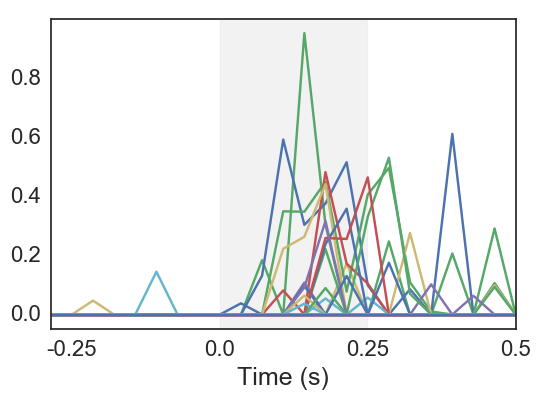

In [53]:
with sns.axes_style('white'):
    plt.figure(figsize=(6,4))
    for i in range(len(subset)):
        plt.plot(subset.iloc[i])
    plt.axvspan(28,35, color='gray', alpha=0.1)
    plt.xticks(range(0,64,7), np.arange(-1., 1., 0.25))
    plt.xlim(20,42)
    plt.xlabel("Time (s)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.ylim(-0.05,1)
#     plt.yticks([0,0.2, 0.4, 0.6])

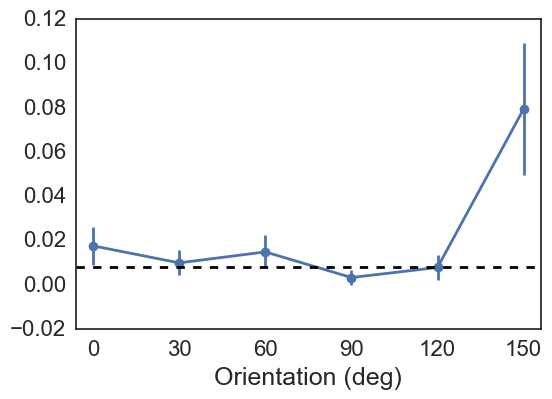

In [95]:
with sns.axes_style('white'):
    plt.figure(figsize=(6,4))
    plt.errorbar(range(6), response_B[:,sf,phase,0], yerr=response_B[:,sf,phase,1], fmt='o-', lw=2)
    plt.xlim(-0.2,5.2)
    plt.xticks(range(6), range(0,180,30), fontsize=16)
    plt.xlabel("Orientation (deg)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_B[0,0,0,0], ls='--', color='k', lw=2)
#     plt.ylim(-0.01, 0.1)

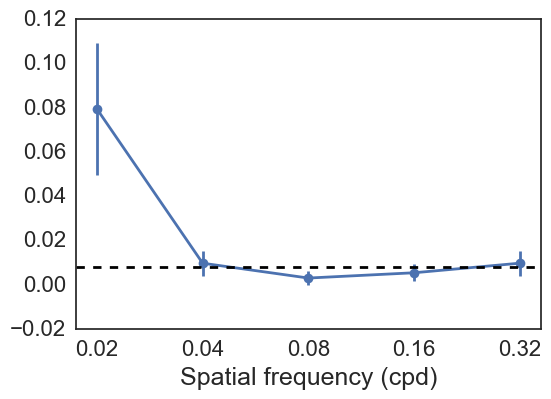

In [96]:
with sns.axes_style('white'):
    plt.figure(figsize=(6,4))
    plt.errorbar(range(5), response_B[ori,1:,phase,0], yerr=response_B[ori,1:,phase,1], fmt='o-', lw=2)
    plt.xlim(-0.2, 4.2)
    plt.xticks(range(5), sfvals, fontsize=16)
    plt.xlabel("Spatial frequency (cpd)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_B[0,0,0,0], ls='--', color='k', lw=2)
#     plt.ylim(-0.01, 0.1)

In [76]:
cell_list
#0 540:600
#1 ??
#2 400:460
#3 2400:2460

[576381664, 576370769, 517475944, 576382869]

In [81]:
sys.path.append('/Users/saskiad/visual_coding_2p_analysis/visual_coding_2p_analysis')

In [82]:
import core

In [1492]:
nc=0
session_B =  boc.get_ophys_experiments(cell_specimen_ids=[cell_list[nc]], stimuli=['static_gratings'])[0]['id']
dataset = boc.get_ophys_experiment_data(session_B)
id_B = dataset.get_cell_specimen_indices(cell_specimen_ids=[cell_list[nc]])[0]
ts,dff = dataset.get_dff_traces()
events = core.get_L0_events(session_B)

Loading L0 events for: 569478789


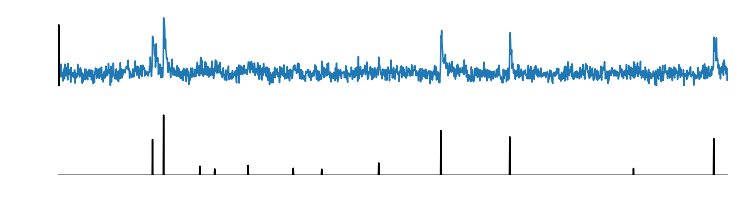

In [1459]:
with sns.axes_style('white'):
    f, (ax2,ax1) = plt.subplots(2, sharex=True, figsize=(12,3))
    ax1.plot(ts, events[id_B,:], 'k')
    ax2.plot(ts, dff[id_B,:])  
    ax2.set_ylabel("DF/F", fontsize=18)
    plt.xlim(540,600)
    ax2.set_ylim(-0.1, 0.5)
    ax1.set_ylim(0, 0.5)
    plt.xlabel("Time (s)", fontsize=18)
    ax1.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
    ax1.axis("off")
    ax2.axis("off")
    ax2.axvline(x=540, ymin=0, ymax=0.83, color='k', lw=3)
    figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_0_dff_events'
#     save_figure(f, figname)

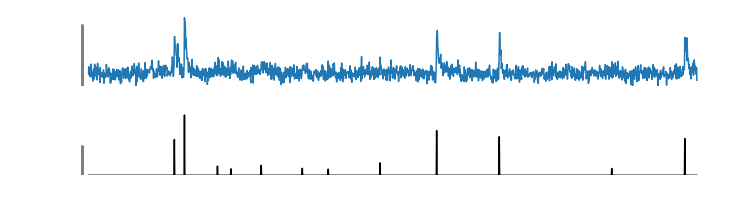

In [1494]:
lm = np.where(ts>540)[0][0]
lx = np.where(ts>600)[0][0]

with sns.axes_style('white'):
    f, (ax2,ax1) = plt.subplots(2, sharex=True, figsize=(12,3))
    ax1.plot(events[id_B,lm:lx], 'k')
    ax2.plot(dff[id_B,lm:lx])  
    ax2.set_ylabel("DF/F", fontsize=18)
#     plt.xlim(540,600)
    ax2.set_ylim(-0.1, 0.5)
    ax1.set_ylim(0, 0.5)
    plt.xlabel("Time (s)", fontsize=18)
    ax1.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
    ax1.axis("off")
    ax2.axis("off")
    ax2.axvline(x=-20, ymin=0, ymax=0.83, color='gray', lw=3)
    ax1.axvline(x=-20, ymin=0, ymax=0.4, color='gray', lw=3)
    figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_0_dff_events'
    save_figure(f, figname)

In [1350]:
nc=3
session_B =  boc.get_ophys_experiments(cell_specimen_ids=[cell_list[nc]], stimuli=['static_gratings'])[0]['id']
dataset = boc.get_ophys_experiment_data(session_B)

id_B = dataset.get_cell_specimen_indices(cell_specimen_ids=[cell_list[nc]])[0]

ns_file = os.path.join(ns_path, str(session_B)+'_ns_events_analysis.h5')

f = h5py.File(ns_file)
response_ns = f['response_events'].value
f.close()

In [1351]:
ts,dff = dataset.get_dff_traces()

In [360]:
new_L0 = os.path.join(new_event_path, 'expt_'+str(session_B)+'_events.npy')

events = np.load(new_L0)

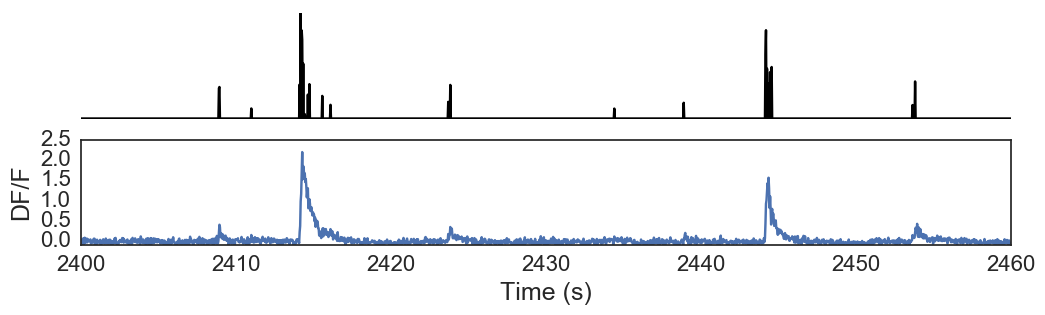

In [364]:
with sns.axes_style('white'):
    f, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(12,3))
    ax1.plot(ts, events[id_B,:], 'k')
    ax2.plot(ts, dff[id_B,:])  
    ax2.set_ylabel("DF/F", fontsize=18)
    plt.xlim(2400,2460)
    ax2.set_ylim(-0.1, 2.5)
    ax1.set_ylim(0, 1.5)
    plt.xlabel("Time (s)", fontsize=18)
    ax1.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
#     ax2.set_yticks(range(4))
#     ax1.set_yticks(range(4))
    ax1.axis("off")
#     ax2.axis("off")


In [175]:
sweep_events_ns = pd.read_hdf(ns_file, 'sweep_events')

In [176]:
st_ns = dataset.get_stimulus_table('natural_scenes')

In [177]:
np.argmax(response_ns[:,id_B,0])

6

In [178]:
subset = sweep_events_ns[str(id_B)][st_ns.frame==5]

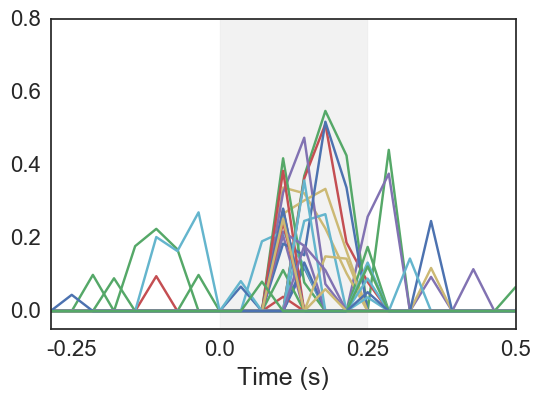

In [179]:
with sns.axes_style('white'):
    plt.figure(figsize=(6,4))
    for i in range(len(subset)):
        plt.plot(subset.iloc[i])
    plt.axvspan(28,35, color='gray', alpha=0.1)
    plt.xticks(range(0,64,7), np.arange(-1., 1., 0.25))
    plt.xlim(20,42)
    plt.xlabel("Time (s)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.ylim(-0.05,0.8)
    plt.yticks([0,0.2,0.4,0.6,0.8])

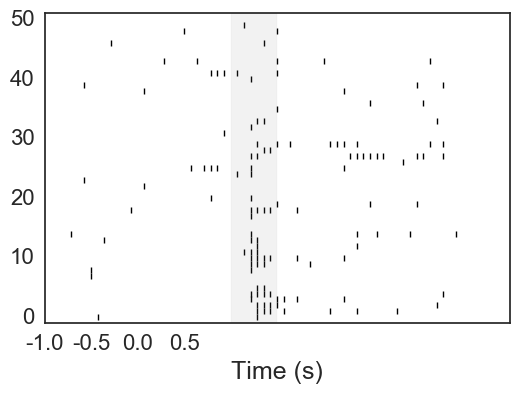

In [183]:
with sns.axes_style('white'):
    for i in range(50):
        plt.scatter(np.where(subset.iloc[i])[0], np.repeat(i, len(np.where(subset.iloc[i])[0])), marker='|', color='k', linewidths=1)
    plt.axvspan(28,35, color='gray', alpha=0.1)
    plt.xticks(range(0,64,7), np.arange(-1., 1., 0.5))
#     plt.xlim(20,42)
    plt.xlabel("Time (s)", fontsize=18)
    plt.ylim(-1,51)
    plt.tick_params(labelsize=16)

# plt.eventplot()

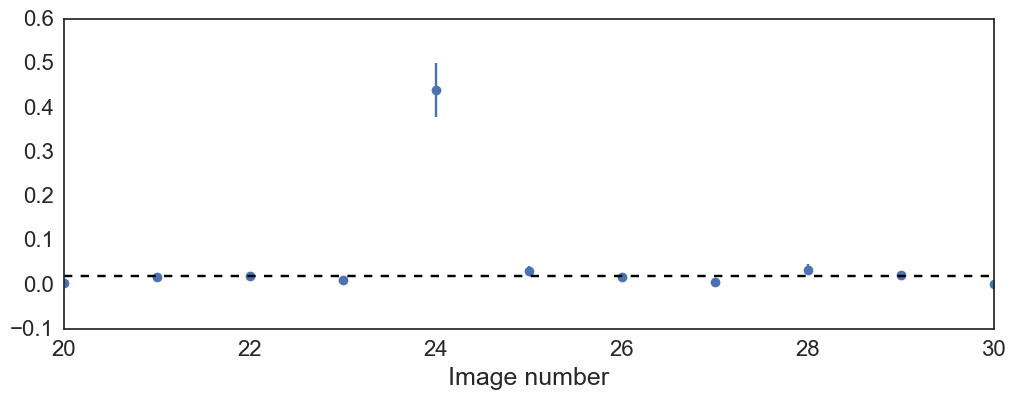

In [181]:
with sns.axes_style('white'):
    plt.figure(figsize=(12,4))
    plt.errorbar(range(118), response_ns[1:,id_B,0], yerr=response_ns[1:,id_B,1], fmt='o')
    plt.xlim(-1, 118)
    plt.xlabel("Image number", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_ns[0,id_B,0], ls='--', color='k')
#     plt.ylim(-0.01, 0.1)

In [102]:
dataset = boc.get_ophys_experiment_data(session_A)

In [103]:
st = dataset.get_stimulus_table('natural_movie_one')

In [106]:
st[st.frame==0]

,frame,start,end,repeat
0,0,38749,38750,0
900,0,39654,39655,1
1800,0,40559,40560,2
2700,0,41464,41464,3
3600,0,42369,42369,4
4500,0,43274,43274,5
5400,0,44179,44179,6
6300,0,45084,45084,7
7200,0,45989,45989,8
8100,0,46894,46894,9


In [111]:
ts, dff = dataset.get_dff_traces(cell_specimen_ids=[cell_list[nc]])

In [114]:
nm_resp = np.empty((900,10))

In [116]:
for i in range(10):
    start = st[(st.frame==0)&(st.repeat==i)].start
    nm_resp[:,i] = dff[0,start:start+900]

/Users/saskiad/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [121]:
nm_mean = nm_resp.mean(axis=1)
nm_sem = nm_resp.std(axis=1)/np.sqrt(10)

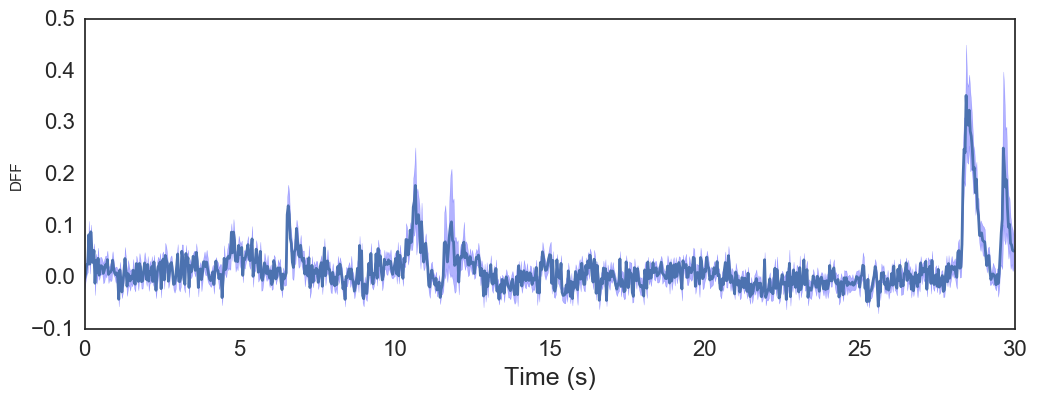

In [131]:
with sns.axes_style('white'):
    plt.figure(figsize=(12,4))
    plt.fill_between(range(900),nm_mean+nm_sem, nm_mean-nm_sem, color='b', alpha=0.3)
    plt.plot(nm_mean, lw=2)
    plt.xticks(range(0,901,150), range(0,31,5))
    plt.xlabel("Time (s)", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.ylabel("DFF")

In [245]:
boc.get_ophys_experiments(ids=[501498760])

[{'acquisition_age_days': 102,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222420',
  'experiment_container_id': 511510667,
  'fail_eye_tracking': True,
  'id': 501498760,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222420',
  'targeted_structure': u'VISp'}]

### Looking at example NS cells

In [247]:
new_ns_path = r'/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/Visual Coding Event Analysis/Natural Scenes 2'

In [252]:
cells = np.load(r'/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/Visual Coding Event Analysis/ns_cells.npy')

In [257]:
nc=3
cell_id = cells[nc]
session_B =  boc.get_ophys_experiments(cell_specimen_ids=[cell_id], stimuli=['static_gratings'])[0]['id']
dataset = boc.get_ophys_experiment_data(session_B)

id_B = dataset.get_cell_specimen_indices(cell_specimen_ids=[cell_id])[0]

ns_file = os.path.join(ns_path, str(session_B)+'_ns_events_analysis.h5')
new_ns_file = os.path.join(new_ns_path, str(session_B)+'_ns_events_analysis.h5')

f = h5py.File(ns_file)
response_ns = f['response_events'].value
f.close()

f = h5py.File(new_ns_file)
response_ns_new = f['response_events'].value
f.close()

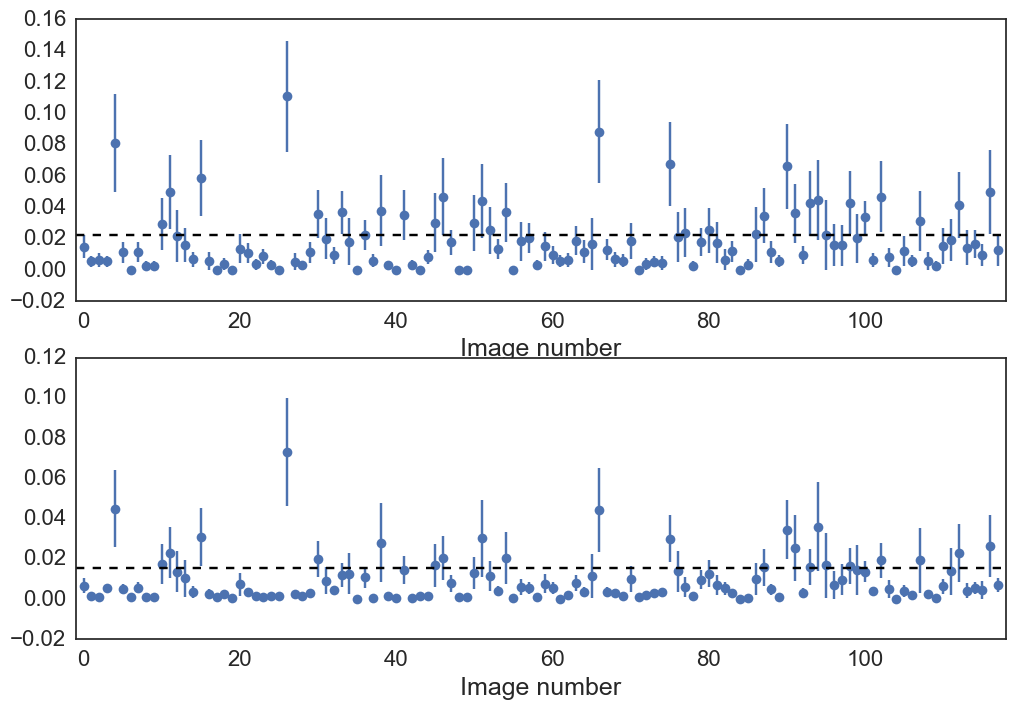

In [258]:
with sns.axes_style('white'):
    plt.figure(figsize=(12,8))
    plt.subplot(211)
    plt.errorbar(range(118), response_ns[1:,id_B,0], yerr=response_ns[1:,id_B,1], fmt='o')
    plt.xlim(-1, 118)
    plt.xlabel("Image number", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_ns[0,id_B,0], ls='--', color='k')
    plt.subplot(212)
    plt.errorbar(range(118), response_ns_new[1:,id_B,0], yerr=response_ns_new[1:,id_B,1], fmt='o')
    plt.xlim(-1, 118)
    plt.xlabel("Image number", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.axhline(y=response_ns_new[0,id_B,0], ls='--', color='k')

In [330]:
df_temp = pd.DataFrame(boc.get_ophys_experiments(include_failed=True))

In [334]:
df_temp.keys()

Index([u'cre_line', u'donor_name', u'failed', u'id', u'imaging_depth',
       u'reporter_line', u'specimen_name', u'tags', u'targeted_structure'],
      dtype='object')

In [333]:
df_temp = pd.DataFrame(boc.get_experiment_containers(include_failed=True))

In [338]:
df_temp.head()

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Cux2-CreERT2,283284,False,566759225,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-283284,[],VISam
1,Nr5a1-Cre,261969,False,546328009,350,Ai93(TITL-GCaMP6f),Nr5a1-Cre;Camk2a-tTA;Ai93-261969,[],VISal
2,Scnn1a-Tg3-Cre,230570,False,511510911,350,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],VISp
3,Rbp4-Cre_KL100,234584,False,511511015,375,Ai93(TITL-GCaMP6f),Rbp4-Cre;Camk2a-tTA;Ai93-234584,[],VISpm
4,Emx1-IRES-Cre,284669,False,569792815,375,Ai93(TITL-GCaMP6f),Emx1-IRES-Cre;Camk2a-tTA;Ai93-284669,[],VISam


In [116]:
metrics = pd.read_csv(r'/Users/saskiad/Documents/Data/CAM/metrics_all_180413.csv')

/Users/saskiad/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,23,24,27,28,34,48,49,52,53,57,66,67,70,71,74,78,82,86,90,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [117]:
len(metrics)

65059

In [1029]:
print metrics[metrics.cell_specimen_id==cell_id].area_on_1
print metrics[metrics.cell_specimen_id==cell_id].area_off_1

42743    327.487639
Name: area_on_1, dtype: float64
42743    515.773874
Name: area_off_1, dtype: float64


In [1030]:
int(metrics[metrics.cell_specimen_id==cell_id].experiment_container_id.values[0])

584635095

In [126]:
sst_cells = metrics[(metrics.tld1_name=='Sst-IRES-Cre')&(metrics.responsive_dg==True)&(
    metrics.responsive_ns==True)&(metrics.responsive_lsn==True)&(metrics.responsive_sg==True)
                    &(metrics.responsive_nm1a==True)]

In [617]:
vip_cells = metrics[(metrics.tld1_name=='Vip-IRES-Cre')&(
    metrics.responsive_ns==True)&(metrics.responsive_lsn==True)&(metrics.responsive_sg==True)
                    &(metrics.responsive_nm1a==True)]

In [618]:
len(vip_cells)

40

In [1664]:
cell_id = int(sst_cells.cell_specimen_id.iloc[41])
print cell_id

591460894


In [1649]:
cell_id = int(vip_cells.cell_specimen_id.iloc[9])
print cell_id

589142470


In [1665]:
print cell_id

591460894


In [1666]:
exp_id = int(metrics[metrics.cell_specimen_id==cell_id].experiment_container_id_x.values[0])
print exp_id

575827179


In [1652]:
exp_id = int(metrics[metrics.cell_specimen_id==cell_id].experiment_container_id_x.values[0])
session_A =  boc.get_ophys_experiments(experiment_container_ids=[exp_id], stimuli=['drifting_gratings'])[0]['id']
dataset = boc.get_ophys_experiment_data(session_A)

id_A = dataset.get_cell_specimen_indices(cell_specimen_ids=[cell_id])[0]

dg_file = os.path.join(dg_path, str(session_A)+'_dg_events_analysis.h5')

f = h5py.File(dg_file)
response_dg = f['response_events'].value
f.close()

response_A = response_dg[:,:,id_A,:]
peak = np.where(response_A[:,:,0]==np.nanmax(response_A[:,:,0]))

ori_dg = peak[0][0]
tf = peak[1][0]

mean_sweep_events = pd.read_hdf(dg_file, 'mean_sweep_events')
stim_table = dataset.get_stimulus_table('drifting_gratings')

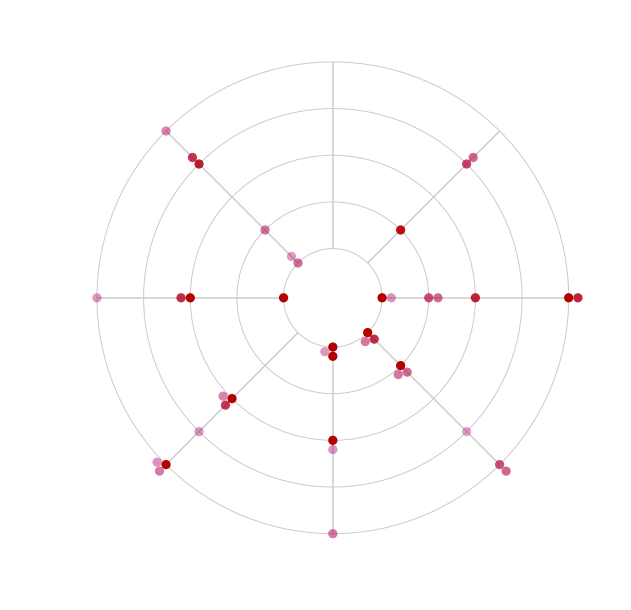

In [1031]:
cmin = response_A[0,0,0]
cmax = mean_sweep_events[str(id_A)].mean() + (mean_sweep_events[str(id_A)].std()*3)

fig = plt.figure(figsize=(8,8))
mask = stim_table.dropna(subset=['orientation']).index
fp.plot(r_data=stim_table.temporal_frequency.ix[mask].values, 
                   angle_data=stim_table.orientation.ix[mask].values,
                  data = mean_sweep_events[str(id_A)].ix[mask].values, clim=[cmin,cmax])
fp.show_axes(closed=True)
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_vip_dg_star'
# save_figure(fig, figname)

In [1021]:
nm_file = os.path.join(nm_path, str(session_A)+'_nm_events_analysis.h5')

f = h5py.File(nm_file)
response_nm = f['response_events_1a'].value
response_trials_nm = f['response_trials_1a'].value
f.close()

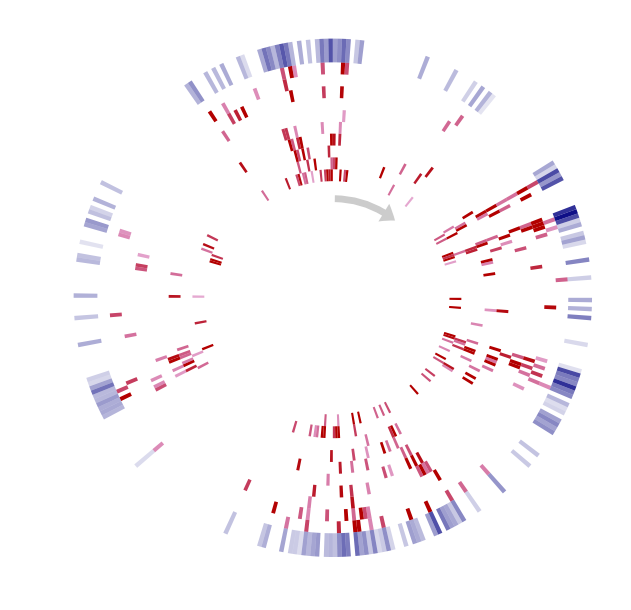

In [1032]:
fig = plt.figure(figsize=(8,8))
data = response_trials_nm[:,id_A,:].T
tp.plot(data, clim=[0, data.mean()+data.std()*3])
tp.show_arrow()
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_vip_nm_track'
# save_figure(fig, figname)

In [1653]:
session_B =  boc.get_ophys_experiments(experiment_container_ids=[exp_id], stimuli=['static_gratings'])[0]['id']
dataset = boc.get_ophys_experiment_data(session_B)

id_B = dataset.get_cell_specimen_indices(cell_specimen_ids=[cell_id])[0]

sg_file = os.path.join(sg_path, str(session_B)+'_sg_events_analysis.h5')

f = h5py.File(sg_file)
response_sg = f['response_events'].value
f.close()

response_B = response_sg[:,:,:,id_B,:]

peak = np.where(response_B[:,1:,:,0]==np.nanmax(response_B[:,1:,:,0]))

ori = peak[0][0]
sf = peak[1][0]
phase = peak[2][0]

mean_sweep_events = pd.read_hdf(sg_file, 'mean_sweep_events')
stim_table_sg = dataset.get_stimulus_table('static_gratings')

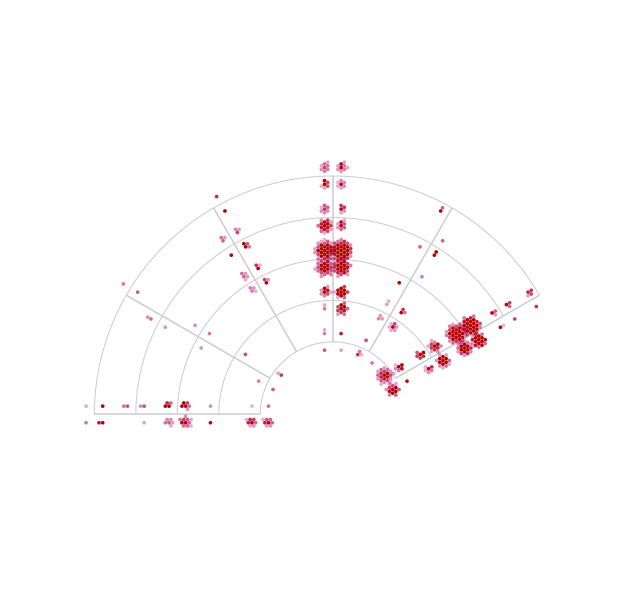

In [1428]:
##FIXED FAN PLOT 
    
cmin = response_B[0,0,0,0]
cmax = mean_sweep_events[str(id_B)].mean() + (mean_sweep_events[str(id_B)].std()*3)

fig = plt.figure(figsize=(8,8))
mask = stim_table_sg.dropna(subset=['orientation']).index
fpb2.plot(r_data=stim_table_sg.spatial_frequency.ix[mask].values, 
                   angle_data=stim_table_sg.orientation.ix[mask].values,
        group_data=stim_table_sg.phase.ix[mask].values,
                  data = mean_sweep_events[str(id_B)].ix[mask].values, clim=[cmin,cmax])
fpb2.show_axes(closed=False)
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_sst_sg_fan'
save_figure(fig, figname)

In [1654]:
ns_file = os.path.join(ns_path, str(session_B)+'_ns_events_analysis.h5')

f = h5py.File(ns_file)
response_ns = f['response_events'].value
f.close()

mean_sweep_events = pd.read_hdf(ns_file, 'mean_sweep_events')

stim_table_ns = dataset.get_stimulus_table('natural_scenes')

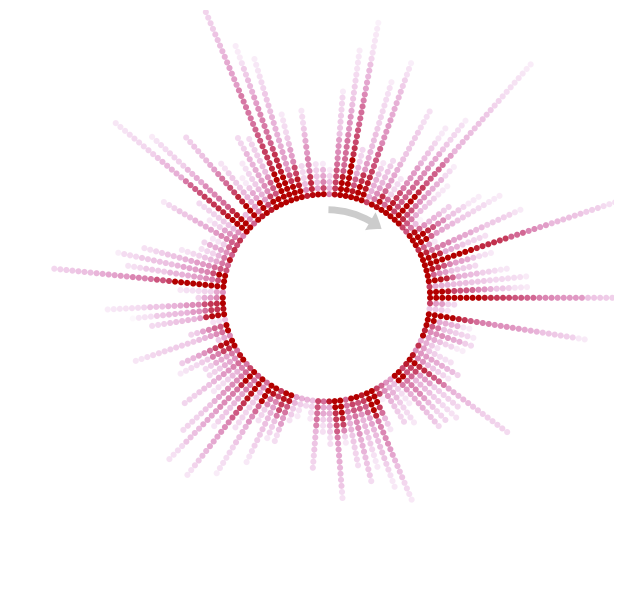

In [1389]:
cmin=response_ns[0,id_B,0]
cmax=mean_sweep_events[str(id_B)].mean()+mean_sweep_events[str(id_B)].std()*3

fig = plt.figure(figsize=(8,8))
mask = stim_table_ns[stim_table_ns.frame>=0].index
corp.plot(stim_table_ns.frame.ix[mask].values,
         data=mean_sweep_events[str(id_B)].ix[mask].values,
         clim=[cmin,cmax])
corp.show_arrow()
plt.axis('off')
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_vip_ns_corona'
# save_figure(fig, figname)

In [1656]:
peak = pd.read_hdf(ns_file, 'peak')

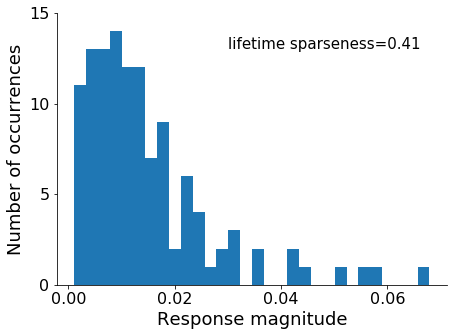

In [1659]:
nc=id_B
fig = plt.figure(figsize=(7,5))
plt.hist(response_ns[1:,nc,0], bins=30);
plt.xlabel("Response magnitude", fontsize=18)
plt.ylabel("Number of occurrences", fontsize=18)
plt.tick_params(labelsize=16)
ls = np.round(peak.lifetime_sparseness_ns[nc],2)
plt.text(s='lifetime sparseness='+str(ls), x=0.03, y=13, fontsize=15)
plt.xticks([0,0.02, 0.04, 0.06])
plt.yticks([0,5,10,15])
sns.despine(fig)
figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_vip_lifesparse'
save_figure(fig, figname)

In [1519]:
dataset = boc.get_ophys_experiment_data(session_B)
ts,dff = dataset.get_dff_traces()
events = core.get_L0_events(session_B)

Loading L0 events for: 583631286


sst 2340,2400 [scale bar 0.13, 0.22]
vip 2840,2900 [scale bar 0.18, 0.2]

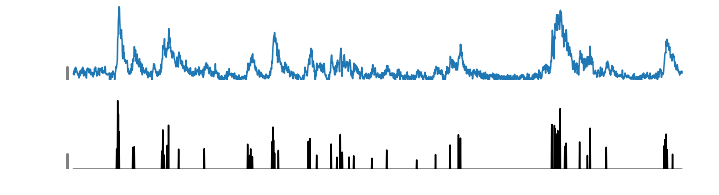

In [1543]:
lm = np.where(ts>2840)[0][0]
lx = np.where(ts>2900)[0][0]

with sns.axes_style('white'):
    f, (ax2,ax1) = plt.subplots(2, sharex=True, figsize=(12,3))
    ax1.plot(events[id_B,lm:lx], 'k')
    ax2.plot(dff[id_B,lm:lx])  
    ax2.set_ylabel("DF/F", fontsize=18)
    ax2.set_ylim(-0.2, 2.6)
    ax1.set_ylim(0, 1)
    ax1.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
    ax1.axis("off")
    ax2.axis("off")
    ax2.axvline(x=-20, ymin=0, ymax=0.18, color='gray', lw=3)
    ax1.axvline(x=-20, ymin=0, ymax=0.2, color='gray', lw=3)
    figname = r'/Users/saskiad/Documents/CAM/paper figures/examples/cell_vip_dff_events'
    save_figure(f, figname)

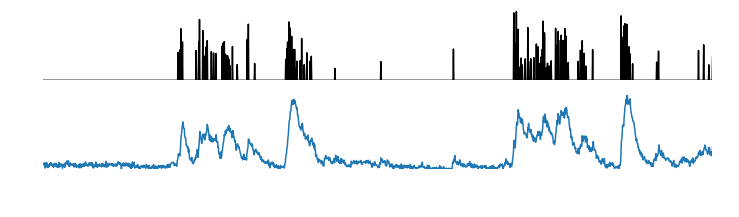

In [1086]:
with sns.axes_style('white'):
    f, (ax2,ax1) = plt.subplots(2, sharex=True, figsize=(12,3))
    ax1.plot(ts, events[id_B,:], 'k')
    ax2.plot(ts, dff[id_B,:])  
    ax2.set_ylabel("DF/F", fontsize=18)
    plt.xlim(2340,2400)
    ax2.set_ylim(-0.2, 3.5)
    ax1.set_ylim(0, 0.9)
    plt.xlabel("Time (s)", fontsize=18)
    ax1.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
#     ax2.set_yticks(range(4))
#     ax1.set_yticks(range(4))
    ax1.axis("off")
    ax2.axis("off")
#     plt.axvline(x=540, ymin=0, ymax=0.5, color='k', lw=3)


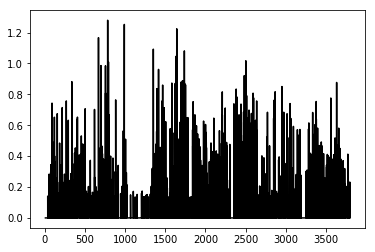

In [1070]:
plt.plot(ts, events[id_B,:], 'k')

In [1352]:
dff.shape

(82, 114123)

In [1359]:
stim_epoch = dataset.get_stimulus_epoch_table()

In [1360]:
stim_epoch

,stimulus,start,end
0,static_gratings,735,15218
1,natural_scenes,16124,30605
2,spontaneous,30755,39657
3,natural_scenes,39658,54141
4,static_gratings,55046,69529
5,natural_movie_one,70435,79485
6,natural_scenes,80391,96320
7,static_gratings,97603,113896


(-5706.1000000000004,
 119828.10000000001,
 -8.7056954070925716,
 176.12264757007361)

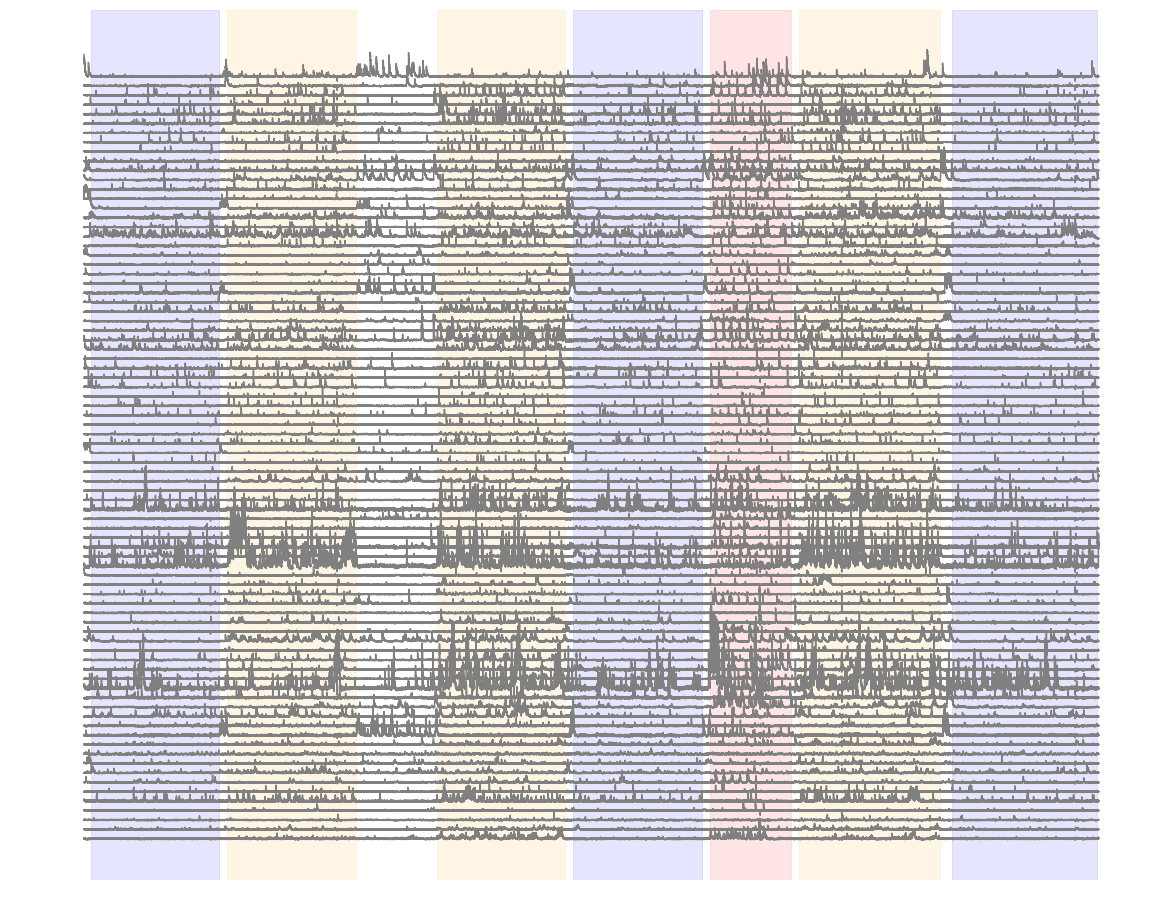

In [1369]:
plt.figure(figsize=(20,16))
for i in range(82):
    plt.plot(dff[i,:]+(i*2), color='gray')
stim = stim_epoch[stim_epoch.stimulus=='static_gratings']
plt.axvspan(xmin=stim.start.iloc[0], xmax=stim.end.iloc[0], color='blue', alpha=0.1)
plt.axvspan(xmin=stim.start.iloc[1], xmax=stim.end.iloc[1], color='blue', alpha=0.1)
plt.axvspan(xmin=stim.start.iloc[2], xmax=stim.end.iloc[2], color='blue', alpha=0.1)
stim = stim_epoch[stim_epoch.stimulus=='natural_scenes']
plt.axvspan(xmin=stim.start.iloc[0], xmax=stim.end.iloc[0], color='orange', alpha=0.1)
plt.axvspan(xmin=stim.start.iloc[1], xmax=stim.end.iloc[1], color='orange', alpha=0.1)
plt.axvspan(xmin=stim.start.iloc[2], xmax=stim.end.iloc[2], color='orange', alpha=0.1)
stim = stim_epoch[stim_epoch.stimulus=='natural_movie_one']
plt.axvspan(xmin=stim.start.iloc[0], xmax=stim.end.iloc[0], color='red', alpha=0.1)
plt.axis('off')

In [1370]:
dataset.get_metadata()

{'age_days': 126,
 'cre_line': u'Nr5a1-Cre/wt',
 'device': u'Nikon A1R-MP multiphoton microscope',
 'device_name': u'CAM2P.1',
 'excitation_lambda': u'910 nanometers',
 'experiment_container_id': 570278595,
 'fov': u'400x400 microns (512 x 512 pixels)',
 'genotype': u'Nr5a1-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'imaging_depth_um': 350,
 'indicator': u'GCaMP6f',
 'ophys_experiment_id': 570472763,
 'pipeline_version': u'2.0',
 'session_start_time': datetime.datetime(2017, 2, 21, 12, 35, 8),
 'session_type': u'three_session_B',
 'sex': u'male',
 'specimen_name': u'Nr5a1-Cre;Camk2a-tTA;Ai93-286360',
 'targeted_structure': u'VISp'}

In [1669]:
import matplotlib as mpl

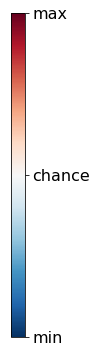

In [1673]:
fig = plt.figure(figsize=(2,5))
ax1 = fig.add_axes([0.05, 0.80, 0.1, 0.9])
cmap = mpl.cm.RdBu_r
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[-1, 0, 1])
#cb1.ax.set_yticks([-1,0,1])
cb1.ax.set_yticklabels(['min','chance','max'], fontsize=16)
plt.tight_layout()
save_figure(fig, r'/Users/saskiad/Documents/CAM/paper figures/fig8_colormap')

In [1676]:
boc.get_ophys_experiments(cell_specimen_ids=[517475944])

[{'acquisition_age_days': 88,
  'cre_line': u'Rbp4-Cre_KL100',
  'donor_name': u'226219',
  'experiment_container_id': 511510896,
  'fail_eye_tracking': False,
  'id': 502962794,
  'imaging_depth': 375,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-226219',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 87,
  'cre_line': u'Rbp4-Cre_KL100',
  'donor_name': u'226219',
  'experiment_container_id': 511510896,
  'fail_eye_tracking': False,
  'id': 502741583,
  'imaging_depth': 375,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-226219',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 86,
  'cre_line': u'Rbp4-Cre_KL100',
  'donor_name': u'226219',
  'experiment_container_id': 511510896,
  'fail_eye_tracking': False,
  'id': 502665019,
  'imaging_depth': 375,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_

In [1677]:
session_id = 501886692

In [1678]:
dataset = boc.get_ophys_experiment_data(session_id)

In [1679]:
events = core.get_L0_events(session_id)

Loading L0 events for: 501886692


In [1684]:
stim_epoch = dataset.get_stimulus_epoch_table()

In [1692]:
stim_epoch

,stimulus,start,end
0,static_gratings,736,15219
1,natural_scenes,16125,30606
2,spontaneous,30756,39658
3,natural_scenes,39659,54159
4,static_gratings,55065,69547
5,natural_movie_one,70453,79503
6,natural_scenes,80409,96324
7,static_gratings,97606,113898


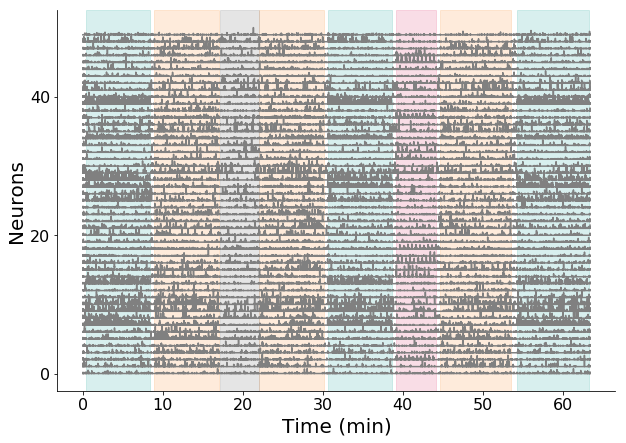

In [1726]:
fig = plt.figure(figsize=(10,7))#(14,8)
for i in range(50):#70
    plt.plot(events[i,:]+(i*0.55), color='gray')

stim = stim_epoch[stim_epoch.stimulus=='static_gratings']
for j in range(len(stim)):
    plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color='#3DB1AA', alpha=0.2)
stim = stim_epoch[stim_epoch.stimulus=='natural_scenes']
for j in range(len(stim)):
    plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color='#FD9D4D', alpha=0.2)
stim = stim_epoch[stim_epoch.stimulus=='natural_movie_one']
for j in range(len(stim)):
    plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color='#E35786', alpha=0.2)
stim = stim_epoch[stim_epoch.stimulus=='spontaneous']
for j in range(len(stim)):
    plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color='gray', alpha=0.2)
sns.despine()
plt.xlabel("Time (min)", fontsize=20)
plt.ylabel("Neurons", fontsize=20)
plt.yticks([0,11,22],[0,20,40])
plt.xticks([0,18000,36000,54000,72000,90000,108000],[0,10,20,30,40,50,60])
plt.tick_params(labelsize=16)
save_figure(fig, r'/Users/saskiad/Documents/CAM/paper figures/event_stim')

In [1707]:
30*60*10

18000

In [1710]:
18+36+18+18

90

In [1715]:
20*0.55

11.0